<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [5]:
## Write your code here
df.duplicated().sum()

np.int64(0)

##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
df_cleaned = df.drop_duplicates(keep='first')

# Step 2: Check if duplicates are removed by counting again
remaining_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows after removal: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [7]:
# Step 1: Identify missing values for all columns
missing_values = df.isnull().sum()

# Step 2: Display the missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [9]:
# Step 1: Count the number of missing values in the 'Employment' column
missing_RemoteWork = df['RemoteWork'].isnull().sum()

# Step 2: Print the result
print(f"Number of missing values in 'RemoteWork' column: {missing_RemoteWork}")


Number of missing values in 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [11]:
# Step 1: Count the frequency of each unique value in the 'RemoteWork' column
remote_work_counts = df['RemoteWork'].value_counts(dropna=False)

# Step 2: Print the value counts
print("Value Counts for 'RemoteWork' column:")
print(remote_work_counts)


Value Counts for 'RemoteWork' column:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [12]:
# Step 1: Use mode() to find the most frequent (majority) value in the 'RemoteWork' column
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# Step 2: Print the most frequent value
print(f"The most frequent value in the 'RemoteWork' column is: {most_frequent_remote_work}")


The most frequent value in the 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [13]:
# Step 1: Get the most frequent value in 'RemoteWork' column
most_frequent_remote = df['RemoteWork'].mode()[0]

# Step 2: Fill all missing values in 'RemoteWork' with the most frequent value
df['RemoteWork'].fillna(most_frequent_remote, inplace=True)

# Step 3: Verify if all missing values are filled
missing_after_impute = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork' after imputation: {missing_after_impute}")


Missing values in 'RemoteWork' after imputation: 0


##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns found in the dataset:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']

Statistical summary of 'ConvertedCompYearly':
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


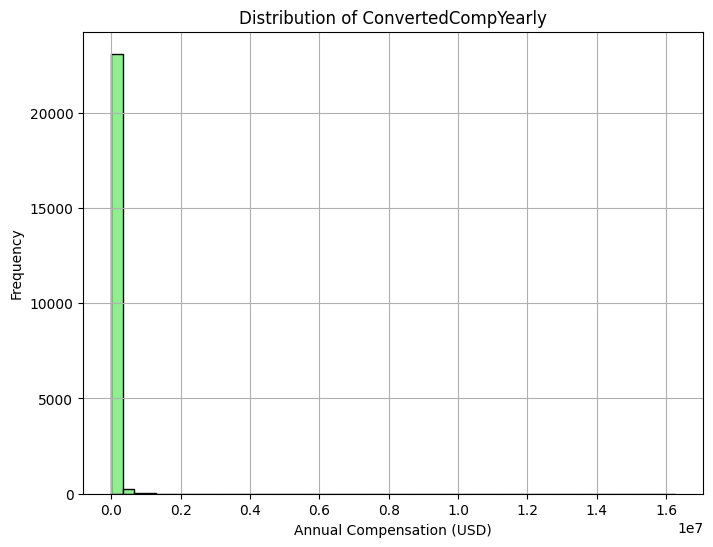

In [14]:
# Step 1: Check for columns related to compensation
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col]
print("Compensation-related columns found in the dataset:")
print(compensation_columns)

# Step 2: Describe the main compensation column (assuming it's 'ConvertedCompYearly')
if 'ConvertedCompYearly' in compensation_columns:
    print("\nStatistical summary of 'ConvertedCompYearly':")
    print(df['ConvertedCompYearly'].describe())

    # Optional: Plot distribution using histogram
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    df['ConvertedCompYearly'].dropna().plot(kind='hist', bins=50, color='lightgreen', edgecolor='black')
    plt.title("Distribution of ConvertedCompYearly")
    plt.xlabel("Annual Compensation (USD)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
else:
    print("\nNo 'ConvertedCompYearly' column found to analyze.")


### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
